In [1]:
import openml
import pandas as pd

# Load the dataset from OpenML
dataset = openml.datasets.get_dataset(40945)
df, *_ = dataset.get_data()

# Display shape and preview
print(f"Shape: {df.shape}")
df.head()


Shape: (1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   uint8   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   uint8   
 6   parch      1309 non-null   uint8   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), object(5), uint8(3)
memory usage: 90.0+ KB


In [6]:
#df.describe()

In [7]:
df.drop(columns=['cabin', 'boat', 'body', 'home.dest'], inplace=True)
print(f"Remaining columns: {df.columns.tolist()}")



Remaining columns: ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked']


In [8]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)



In [9]:
missing_df

,Missing Count,Missing %
age,263,20.091673
embarked,2,0.152788
fare,1,0.076394
pclass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
ticket,0,0.000000


In [10]:
# Median imputation for 'age' column
# Fill missing values in 'age' with the median of the column
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3000\634594765.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [11]:
# For 'embarked' column, fill missing values with the mode (most frequent value)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_3000\2506202917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [12]:
# For fare column, fill missing values with the median fare
df['fare'].fillna(df['fare'].median(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_3000\2359535983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare'].fillna(df['fare'].median(), inplace=True)


In [13]:
# check if there are any missing values left
print("Any missing values left?", df.isnull().any().any())


Any missing values left? False


In [ ]:
# passenger title 
#  Extract Title
df['title'] = df['name'].str.extract(r',\s*([^\.]+)\.')

# View counts
df['title'].value_counts()


title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: count, dtype: int64

In [15]:
# sum of siblings and parents/children
# Create a new feature 'family_size' as the sum of 'sibsp' and 'parch' plus 1 (for the individual themselves)
df['family_size'] = df['sibsp'] + df['parch'] + 1


In [17]:
# passsenger alone
# Create a new feature 'is_alone' to indicate if the passenger is traveling alone (family_size == 1)
df['is_alone'] = (df['family_size'] == 1).astype(int)


In [19]:
# Grouping titles
# Grouping titles into broader categories
df['title'] = df['title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Capt': 'Rare',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty',
    'Don': 'Royalty',
    'Dona': 'Royalty',
    'the Countess': 'Royalty',
})

# Recheck after grouping
df['title'].value_counts()


title
Mr         757
Miss       264
Mrs        198
Master      61
Rare        23
Royalty      6
Name: count, dtype: int64

In [20]:
# convert categorical variables to numerical
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['embarked', 'title'], drop_first=True)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(['name', 'ticket','survived'], axis=1)
y = df['survived'].astype(int)  # ensure it's integer for classification

# Train-test split (80/20), stratify to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale only numeric columns 
scale_cols = ['age', 'fare', 'family_size']
scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])


In [27]:
# Sample 30% of the training set
X_train_sampled = X_train.sample(frac=0.3, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model
rf_baseline = RandomForestClassifier(random_state=42)

# Fit on sampled training data
rf_baseline.fit(X_train_sampled, y_train_sampled)

# Predict on test set
y_pred = rf_baseline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7900763358778626

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       162
           1       0.73      0.71      0.72       100

    accuracy                           0.79       262
   macro avg       0.78      0.77      0.78       262
weighted avg       0.79      0.79      0.79       262


Confusion Matrix:
 [[136  26]
 [ 29  71]]


In [25]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,family_size,is_alone,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare,title_Royalty
0,1,1,"Allen, Miss. Elisabeth Walton",1,-0.039005,0,0,24160,3.442584,-0.558346,1,False,True,True,False,False,False,False
1,1,1,"Allison, Master. Hudson Trevor",0,-2.215952,1,2,113781,2.286639,1.336749,0,False,True,False,False,False,False,False
2,1,0,"Allison, Miss. Helen Loraine",1,-2.131977,1,2,113781,2.286639,1.336749,0,False,True,True,False,False,False,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,0.038512,1,2,113781,2.286639,1.336749,0,False,True,False,True,False,False,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,-0.349075,1,2,113781,2.286639,1.336749,0,False,True,False,False,True,False,False


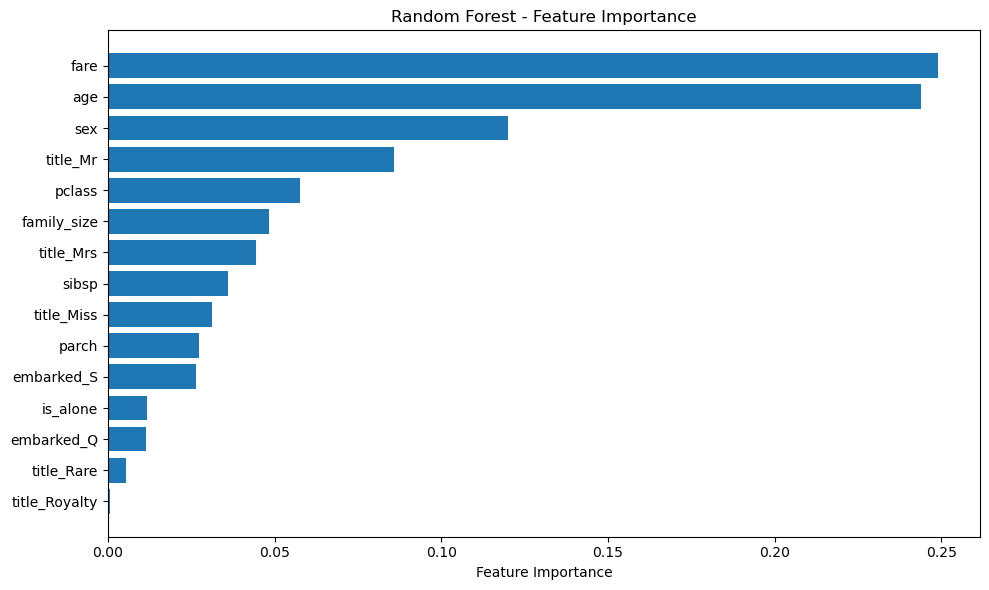

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for feature importances
importances = pd.DataFrame({
    'feature': X_train_sampled.columns,
    'importance': rf_baseline.feature_importances_
})

# Sort by importance
importances = importances.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importances['feature'], importances['importance'])
plt.gca().invert_yaxis()  # Highest on top
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [31]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # number of different combinations to try
    cv=3,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1  # use all available cores
)

# Fit on the sampled training data (for speed)
random_search.fit(X_train_sampled, y_train_sampled)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [32]:
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'bootstrap': False}
Best CV Score: 0.7898046398046398


In [33]:
best_rf = random_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\n", classification_report(y_test, y_pred_tuned))


Tuned Accuracy: 0.8320610687022901

               precision    recall  f1-score   support

           0       0.84      0.90      0.87       162
           1       0.81      0.73      0.77       100

    accuracy                           0.83       262
   macro avg       0.83      0.81      0.82       262
weighted avg       0.83      0.83      0.83       262

